# importing libraries

In [2]:
import spacy    #for text cleaning (removing stop_words , lematizations  , puntuations)
import pandas as pd #import datasets
import re #just to lower_case the sentence 

# load spacy 'english'

In [3]:
nlp=spacy.load('en') #load spacy 'english'

# import datasets

In [4]:
data = pd.read_csv('twi_train.csv',encoding = "ISO-8859-1")
data1 = pd.read_csv('twi_test.csv',encoding = "ISO-8859-1")

In [10]:
X = data["SentimentText"]

In [11]:
Y = data['Sentiment']

# + are more compare to -

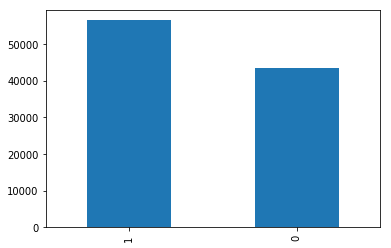

In [13]:
data.Sentiment.value_counts().plot(kind="bar")

# some cleaning of data

In [29]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
texts = []
for i in range(5000):
    rev=re.sub('[^a-zA-Z]',' ',X[i])
    rev=rev.lower();
    doc = nlp(rev, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in nlp.Defaults.stop_words and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)

# creating BOW model

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer 
cv=TfidfVectorizer()
X_train=cv.fit_transform(texts).toarray()  

In [26]:
Y_train=Y.iloc[:5000]

pandas.core.series.Series

# fit in to the selected model

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# use to check model performance when datasets are splitted

In [16]:
from sklearn import metrics

In [ ]:
y_predict = confusion_matrix(Y_test,y_predict)

In [17]:
df = pd.DataFrame(metrics.confusion_matrix(Y_test,y_predict),index=['1','0'],columns=['1','0'])

In [19]:
print(metrics.accuracy_score(Y_test,y_predict))

0.7075
